In [37]:
from cbsim import exhaust
from cbsim import co2
from cbsim import wear

from cbsim.experiment import read_exper_data

from matplotlib import pyplot as plt
import numpy as np

<h2> Read data

<h3> Simulations data - Kraków

In [2]:
wsmin = read_exper_data(['weight-experiment-min.txt',
                         'weight-experiment-min-small.txt',
                         'weight-experiment-min-big.txt'])
wsmid = read_exper_data(['weight-experiment.txt',
                         'weight-experiment-small.txt',
                         'weight-experiment-small-2.txt',
                         'weight-experiment-big.txt',
                         'weight-experiment-0.65.txt',
                         'weight-experiment-0.70.txt'])
wsmax = read_exper_data(['weight-experiment-max-small.txt',
                         'weight-experiment-max.txt',
                         'weight-experiment-max-big.txt'])

wsmin1 = read_exper_data(['weight-experiment-min-p=1.0.txt',
                          'weight-experiment-min-p=1.0-small.txt',
                          'weight-experiment-min-p=1.0-big.txt'])
wsmid1 = read_exper_data(['weight-experiment-p=1.0.txt',
                          'weight-experiment-p=1.0-small.txt',
                          'weight-experiment-p=1.0-big.txt',
                          'weight-experiment-0.65-p=1.0.txt',
                          'weight-experiment-0.70-p=1.0.txt'])
wsmax1 = read_exper_data(['weight-experiment-max-p=1.0.txt',
                          'weight-experiment-max-p=1.0-small.txt',
                          'weight-experiment-max-p=1.0-big.txt'])

vs = {'min': 1028, 'mid': 1186, 'max': 1435}
ws = [w for w in wsmid.keys() if w <= 0.5]

<h3> CCCB data

In [3]:
wcs = {
    'san-sebastian': read_exper_data(['weight-experiment-san-sebastian.txt']),
    'vitoria-gasteiz': read_exper_data(['weight-experiment-vitoria-gasteiz.txt']),
    'dubrovnik': read_exper_data(['weight-experiment-dubrovnik.txt']),
    'mechelen': read_exper_data(['weight-experiment-mechelen.txt'])
}

vehs = {
    'san-sebastian': 387,
    'vitoria-gasteiz': 205,
    'dubrovnik': 15,
    'mechelen': 851,
}

weights = {
    'krakow': 0.2,
    'san-sebastian': 0.1,
    'vitoria-gasteiz': 0.1,
    'dubrovnik': 0.05,
    'mechelen': 0.3
}

cities = list(wcs.keys())

In [2]:
wcs = {
    'san-sebastian': read_exper_data(['sample-ss.txt']),
    'vitoria-gasteiz': read_exper_data(['sample-vg.txt']),
    'dubrovnik': read_exper_data(['sample-dubrovnik.txt']),
    'mechelen': read_exper_data(['sample-mechelen.txt']),
    'krakow': read_exper_data(['sample-krakow.txt'])
}

vehs = {
    'san-sebastian': 387,
    'vitoria-gasteiz': 205,
    'dubrovnik': 15,
    'mechelen': 851,
    'krakow': 1186
}

weights = {
    'krakow': 0.2,
    'san-sebastian': 0.1,
    'vitoria-gasteiz': 0.1,
    'dubrovnik': 0.05,
    'mechelen': 0.3
}

cities = list(wcs.keys())

In [3]:
wcs['san-sebastian']

{0.1: 79.10525000000005}

<h3>Emissions data

In [4]:
coeffs_hot = exhaust.read_coeffs(exhaust.file, exhaust.sheet)
hot_e_fs = exhaust.calc_hot_em_factor(coeffs_hot, exhaust.parameters)
exhaust_params = [30, 70, [50, 30, 9, 6, 4, 1], exhaust.beta, exhaust.eh_ec_coeffs]

<h2>Exhaust emissions
    <h3>Total emissions of CO, NOx, VOC, plus fuel-dependant CO2

In [5]:
# help(exhaust.calc_exhaust_emissions)

def calc_wear(N=100, M=300):
    Es = []
    for i in range(len(wear.E_types)):
        Es.append(wear.calc_wear(N, M,
                                wear.EF_TSP[i], wear.MF[i],
                                wear.pollutants, wear.categories,
                                [30, wear.Sts[i]]))
    return wear.calc_wear_total(Es, wear.categories, wear.pollutants)

calc_wear(M=500)

{'TSP': 28.14,
 'PM10': 20.005,
 'PM2_5': 10.388,
 'PM1': 1.646,
 'PM0_1': 1.3159999999999998}

In [6]:
ws = [w for w in wsmid.keys() if w <= 0.45]

exhausts = {'min': {'co': {}, 'nox': {}, 'voc': {}, 'co2': {}},
            'mid': {'co': {}, 'nox': {}, 'voc': {}, 'co2': {}},
            'max': {'co': {}, 'nox': {}, 'voc': {}, 'co2': {}}}
wears = {'min': {'tsp': {}, 'pm10': {}, 'pm2.5': {}, 'pm1.0': {}, 'pm0.1': {}},
         'mid': {'tsp': {}, 'pm10': {}, 'pm2.5': {}, 'pm1.0': {}, 'pm0.1': {}},
         'max': {'tsp': {}, 'pm10': {}, 'pm2.5': {}, 'pm1.0': {}, 'pm0.1': {}},}

for w in wsmin:

    exs = exhaust.calc_exhaust_emissions(vs['min'], wsmin[w], hot_e_fs, exhaust_params)
    wrs = calc_wear(vs['min'], wsmin[w])
    exhausts['min']['co'][w] = sum(exs['CO'])
    exhausts['min']['nox'][w] = sum(exs['NOx'])
    exhausts['min']['voc'][w] = sum(exs['VOC'])
    exhausts['min']['co2'][w] = co2.calc_co2(vs['min'], wsmin[w], co2.cons, co2.em_fs)
    wears['min']['tsp'][w] = wrs['TSP']
    wears['min']['pm10'][w] = wrs['PM10']
    wears['min']['pm2.5'][w] = wrs['PM2_5']
    wears['min']['pm1.0'][w] = wrs['PM1']
    wears['min']['pm0.1'][w] = wrs['PM0_1']
    
    exs = exhaust.calc_exhaust_emissions(vs['mid'], wsmid[w], hot_e_fs, exhaust_params)
    wrs = calc_wear(vs['mid'], wsmid[w])
    exhausts['mid']['co'][w] = sum(exs['CO'])
    exhausts['mid']['nox'][w] = sum(exs['NOx'])
    exhausts['mid']['voc'][w] = sum(exs['VOC'])
    exhausts['mid']['co2'][w] = co2.calc_co2(vs['mid'], wsmid[w], co2.cons, co2.em_fs)
    wears['mid']['tsp'][w] = wrs['TSP']
    wears['mid']['pm10'][w] = wrs['PM10']
    wears['mid']['pm2.5'][w] = wrs['PM2_5']
    wears['mid']['pm1.0'][w] = wrs['PM1']
    wears['mid']['pm0.1'][w] = wrs['PM0_1']

    exs = exhaust.calc_exhaust_emissions(vs['max'], wsmax[w], hot_e_fs, exhaust_params)
    wrs = calc_wear(vs['max'], wsmax[w])
    exhausts['max']['co'][w] = sum(exs['CO'])
    exhausts['max']['nox'][w] = sum(exs['NOx'])
    exhausts['max']['voc'][w] = sum(exs['VOC'])
    exhausts['max']['co2'][w] = co2.calc_co2(vs['max'], wsmax[w], co2.cons, co2.em_fs)
    wears['max']['tsp'][w] = wrs['TSP']
    wears['max']['pm10'][w] = wrs['PM10']
    wears['max']['pm2.5'][w] = wrs['PM2_5']
    wears['max']['pm1.0'][w] = wrs['PM1']
    wears['max']['pm0.1'][w] = wrs['PM0_1']


NameError: name 'wsmid' is not defined

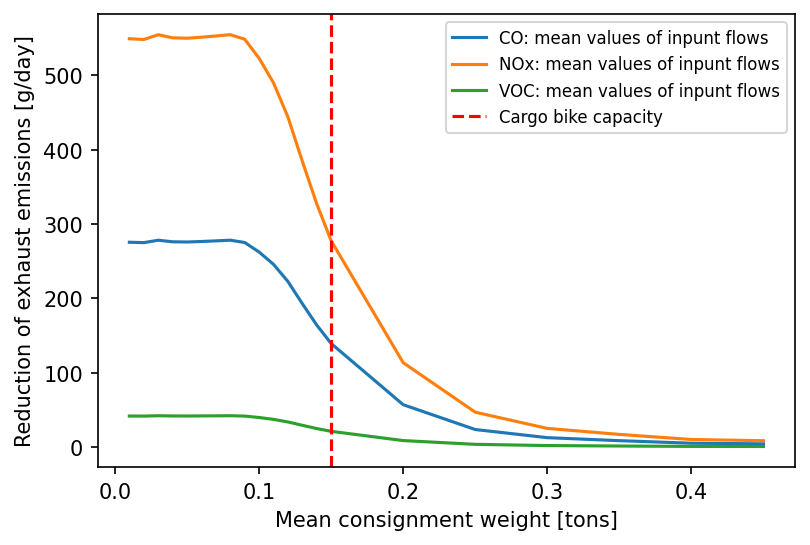

In [11]:
plt.figure(dpi=150)

# plt.plot(ws, [exhausts['min']['co'][w] for w in ws], label='CO: lower bound of inpunt flows')
# plt.plot(ws, [exhausts['min']['nox'][w] for w in ws], label='NOx: lower bound of inpunt flows')
# plt.plot(ws, [exhausts['min']['voc'][w] for w in ws], label='VOC: lower bound of inpunt flows')

plt.plot(ws, [exhausts['mid']['co'][w] for w in ws], label='CO: mean values of inpunt flows')
plt.plot(ws, [exhausts['mid']['nox'][w] for w in ws], label='NOx: mean values of inpunt flows')
plt.plot(ws, [exhausts['mid']['voc'][w] for w in ws], label='VOC: mean values of inpunt flows')

# plt.plot(ws, [exhausts['max']['co'][w] for w in ws], label='CO: upper bound of inpunt flows')
# plt.plot(ws, [exhausts['max']['nox'][w] for w in ws], label='NOx: upper bound of inpunt flows')
# plt.plot(ws, [exhausts['max']['voc'][w] for w in ws], label='VOC: upper bound of inpunt flows')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Reduction of exhaust emissions [g/day]')
plt.legend(fontsize=8)
plt.show()

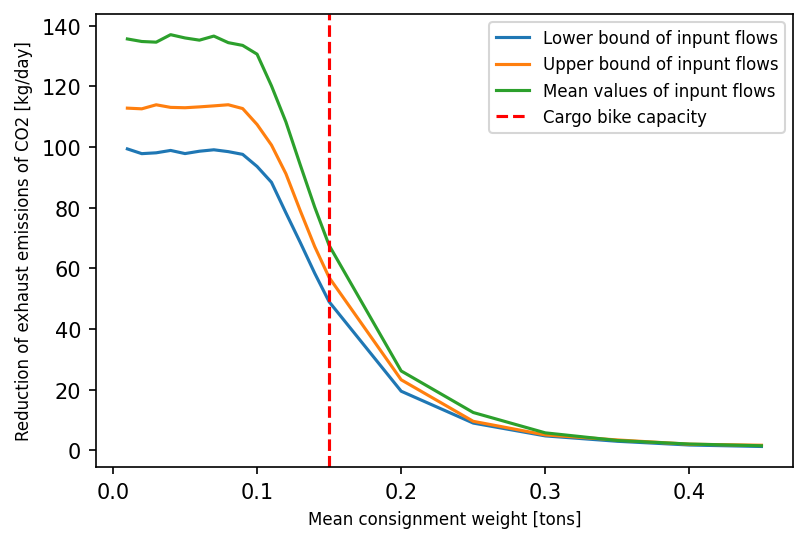

In [7]:
plt.figure(dpi=150)

plt.plot(ws, [exhausts['min']['co2'][w] for w in ws], label='Lower bound of inpunt flows')
plt.plot(ws, [exhausts['mid']['co2'][w] for w in ws], label='Upper bound of inpunt flows')
plt.plot(ws, [exhausts['max']['co2'][w] for w in ws], label='Mean values of inpunt flows')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]', fontsize=8)
plt.ylabel('Reduction of exhaust emissions of CO2 [kg/day]', fontsize=8)
plt.legend(fontsize=8)
plt.show()

<h3>Total emissions of TSP, PM 10, PM 2.5, PM 1, PM 0.1

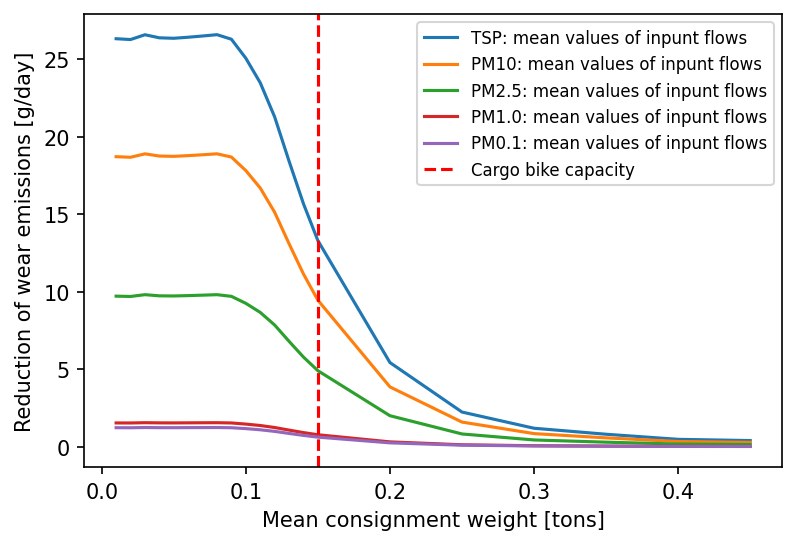

In [9]:
plt.figure(dpi=150)

# plt.plot(ws, [wears['max']['tsp'][w] for w in ws], label='TSP: upper bound of inpunt flows')
# plt.plot(ws, [wears['max']['pm10'][w] for w in ws], label='PM10: upper bound of inpunt flows')
# plt.plot(ws, [wears['max']['pm2.5'][w] for w in ws], label='PM2.5: upper bound of inpunt flows')

plt.plot(ws, [wears['mid']['tsp'][w] for w in ws], label='TSP: mean values of inpunt flows')
plt.plot(ws, [wears['mid']['pm10'][w] for w in ws], label='PM10: mean values of inpunt flows')
plt.plot(ws, [wears['mid']['pm2.5'][w] for w in ws], label='PM2.5: mean values of inpunt flows')
plt.plot(ws, [wears['mid']['pm1.0'][w] for w in ws], label='PM1.0: mean values of inpunt flows')
plt.plot(ws, [wears['mid']['pm0.1'][w] for w in ws], label='PM0.1: mean values of inpunt flows')

# plt.plot(ws, [wears['min']['tsp'][w] for w in ws], label='TSP: lower bound of inpunt flows')
# plt.plot(ws, [wears['min']['pm10'][w] for w in ws], label='PM10: lower bound of inpunt flows')
# plt.plot(ws, [wears['min']['pm2.5'][w] for w in ws], label='PM2.5: lower bound of inpunt flows')

plt.axvline(0.15, linestyle='--', color='red', label='Cargo bike capacity')
plt.xlabel('Mean consignment weight [tons]')
plt.ylabel('Reduction of wear emissions [g/day]')
plt.legend(fontsize=8)

plt.show()

<h1> CCCB exhaust and wear emissions

In [6]:
cccb_exs, cccb_wrs = {}, {}
for city in cities:
    cccb_exs[city], cccb_wrs[city] = {}, {}
    exs = exhaust.calc_exhaust_emissions(vehs[city], wcs[city][weights[city]], hot_e_fs, exhaust_params)
    wrs = calc_wear(vehs[city], wcs[city][weights[city]])
    cccb_exs[city]['co'] = sum(exs['CO'])
    cccb_exs[city]['nox'] = sum(exs['NOx'])
    cccb_exs[city]['voc'] = sum(exs['VOC'])
    cccb_exs[city]['co2'] = co2.calc_co2(vehs[city], wcs[city][weights[city]], co2.cons, co2.em_fs)
    cccb_wrs[city]['tsp'] = wrs['TSP']
    cccb_wrs[city]['pm10'] = wrs['PM10']
    cccb_wrs[city]['pm2.5'] = wrs['PM2_5']
    cccb_wrs[city]['pm1.0'] = wrs['PM1']
    cccb_wrs[city]['pm0.1'] = wrs['PM0_1']


In [7]:
txt = '\t'

for el in cccb_exs[cities[0]]:
    txt += '\t' + el
txt += '\n'

for city in cccb_exs:
    txt += city + '\t'
    for el in cccb_exs[city]:
        txt += str(round(0.365 * cccb_exs[city][el], 3)) + '\t'
    txt += '\n'

print(txt) # [kg/year], CO2 [tons/year]

		co	nox	voc	co2
san-sebastian	17.004	33.908	2.57	6.965	
vitoria-gasteiz	19.426	38.736	2.935	7.957	
dubrovnik	0.0	0.0	0.0	0.0	
mechelen	176.645	352.247	26.692	72.352	
krakow	202.0	402.807	30.523	82.738	



In [8]:
txt = '\t'

for el in cccb_wrs[cities[0]]:
    txt += '\t' + el
txt += '\n'

for city in cccb_wrs:
    txt += city + '\t'
    for el in cccb_wrs[city]:
        txt += str(round(0.365 * cccb_wrs[city][el], 3)) + '\t'
    txt += '\n'

print(txt) # [kg/year]

		tsp	pm10	pm2.5	pm1.0	pm0.1
san-sebastian	1.625	1.155	0.6	0.095	0.076	
vitoria-gasteiz	1.856	1.319	0.685	0.108	0.087	
dubrovnik	0.0	0.0	0.0	0.0	0.0	
mechelen	16.881	12.0	6.232	0.987	0.79	
krakow	19.304	13.723	7.126	1.129	0.903	



In [10]:
for el in exhausts['mid']:
    print(el, round(0.365 * exhausts['mid'][el][weights['krakow']], 3))

NameError: name 'exhausts' is not defined

In [11]:
for el in wears['mid']:
    print(el, round(0.365 * wears['mid'][el][weights['krakow']], 3))

NameError: name 'wears' is not defined

<h2> Emissions reduction

In [1]:
before = {
    'Krakow':
    {
        'CO': 222.522, 'NOx': 443.728, 'VOC': 33.623, 'CO2': 91.143,
        'TSP': 21.265, 'PM10': 15.117, 'PM2.5': 7.85, 'PM1.0': 1.244, 'PM0.1': 0.995
    },
    'San Sebastian':
    {
        'CO': 36.253, 'NOx': 72.293, 'VOC': 5.478, 'CO2': 14.849,
        'TSP': 3.465, 'PM10': 2.463, 'PM2.5': 1.279, 'PM1.0': 0.203, 'PM0.1': 0.162
    },
    'Vitoria-Gasteiz':
    {
        'CO': 23.149, 'NOx': 46.16, 'VOC': 3.498, 'CO2': 9.482,
        'TSP': 2.213, 'PM10': 1.572, 'PM2.5': 0.817, 'PM1.0': 0.13,  'PM0.1': 0.104	
    },
    'Mechelen':
    {
        'CO': 180.28, 'NOx': 359.494, 'VOC': 27.24, 'CO2': 73.841,
        'TSP': 17.228, 'PM10': 12.248, 'PM2.5': 6.36, 'PM1.0': 1.008, 'PM0.1': 0.806
    },
    'Dubrovnik':
    {
        'CO': 3.125, 'NOx': 6.233, 'VOC': 0.472,  'CO2': 1.28,
        'TSP': 0.299, 'PM10': 0.212, 'PM2.5': 0.11, 'PM1.0': 0.018, 'PM0.1': 0.014				
    }
}

after = {
    'Krakow':
    {
        'CO': 202.0, 'NOx': 402.807, 'VOC': 30.523, 'CO2': 82.738,
        'TSP': 19.304, 'PM10': 13.723, 'PM2.5': 7.126, 'PM1.0': 1.129, 'PM0.1': 0.903
    },
    'San Sebastian':
    {
        'CO': 17.004, 'NOx': 33.908, 'VOC': 2.57, 'CO2': 6.965,
        'TSP': 1.625, 'PM10': 1.155, 'PM2.5': 0.6, 'PM1.0': 0.095, 'PM0.1': 0.076
    },
    'Vitoria-Gasteiz':
    {
        'CO': 19.426, 'NOx': 38.736, 'VOC': 2.935, 'CO2': 7.957,
        'TSP': 1.856, 'PM10': 1.319, 'PM2.5': 0.685, 'PM1.0': 0.108, 'PM0.1': 0.087
    },
    'Mechelen':
    {
        'CO': 176.645, 'NOx': 352.247, 'VOC': 26.692, 'CO2': 72.352,
        'TSP': 16.881, 'PM10': 12.0, 'PM2.5': 6.232, 'PM1.0': 0.987, 'PM0.1': 0.79
    },
    'Dubrovnik':
    {
        'CO': 0, 'NOx': 0, 'VOC': 0, 'CO2': 0,
        'TSP': 0, 'PM10': 0, 'PM2.5': 0, 'PM1.0': 0, 'PM0.1': 0 
    }
}

l_ex = ['CO', 'NOx', 'VOC', 'CO2']
l_wr = ['TSP', 'PM10', 'PM2.5', 'PM1.0', 'PM0.1']
cities = list(before.keys())

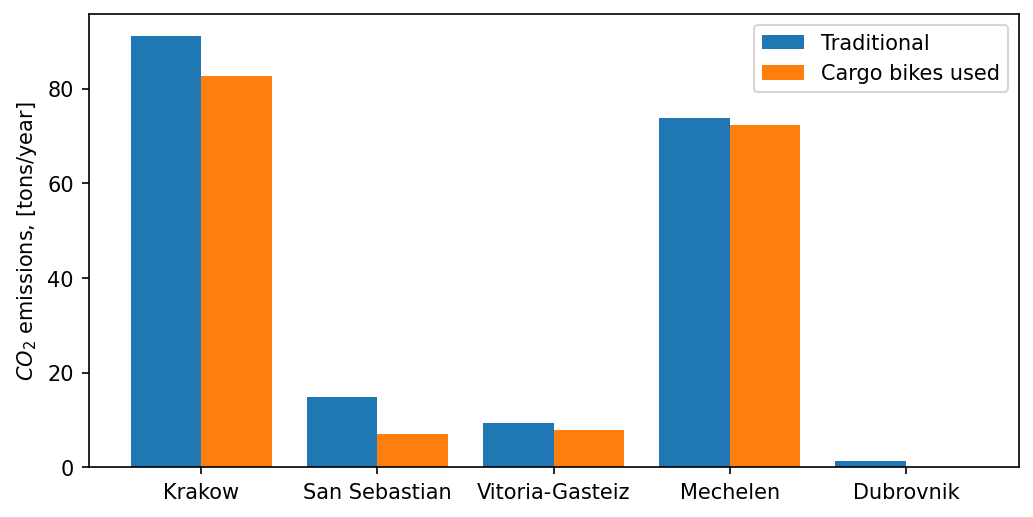

In [57]:
lbls = np.arange(len(cities))
plt.figure(dpi=150, figsize=(8, 4))
plt.bar(lbls - 0.2,
        [before[city]['CO2'] for city in cities], 
        width=0.4, label='Traditional')
plt.bar(lbls + 0.2,
        [after[city]['CO2'] for city in cities], 
        width=0.4, label='Cargo bikes used')
plt.xticks(lbls, cities)
plt.ylabel(r'$CO_2$ emissions, [tons/year]')
plt.legend()
plt.show()

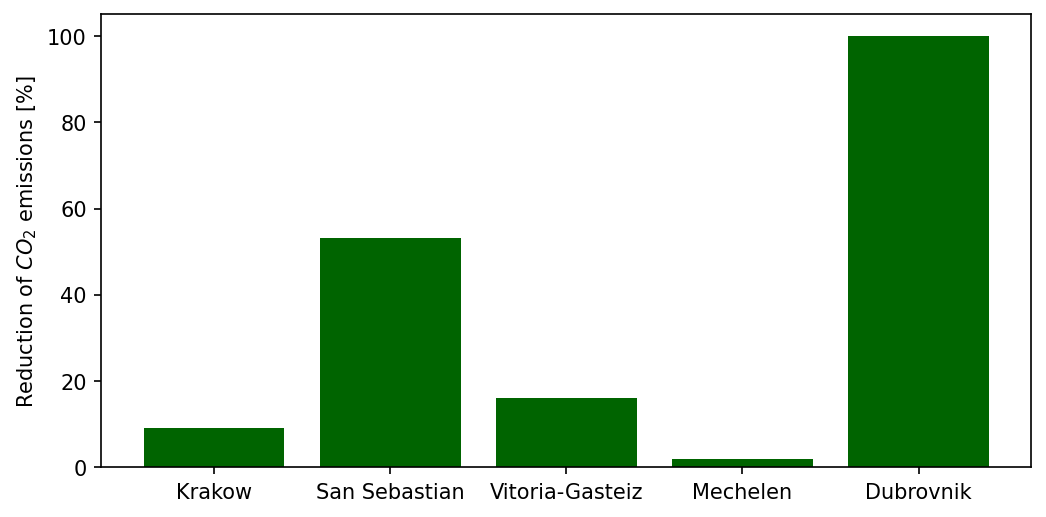

In [60]:
lbls = np.arange(len(cities))
plt.figure(dpi=150, figsize=(8, 4))
plt.bar(lbls,
        [100 * (before[city]['CO'] - after[city]['CO']) / before[city]['CO']
         for city in cities], 
        width=0.8, color='darkgreen')
plt.xticks(lbls, cities)
plt.ylabel(r'Reduction of $CO_2$ emissions [%]')
plt.show()

In [14]:
def print_emissions(data):
    txt = '\t'
    for el in data[cities[0]]:
        txt += '\t' + el
    txt += '\n'
    for city in data:
        txt += city + '\t'
        for el in data[city]:
            txt += str(round(data[city][el], 3)) + '\t'
        txt += '\n'
    print(txt)

In [18]:
delta = {city: {
    l: 0 for l in l_ex + l_wr
} for city in cities}

for city in cities:
    for l in l_ex + l_wr:
        delta[city][l] = round(before[city][l] - after[city][l], 3)
        #delta[city][l] = round(100 * (before[city][l] - after[city][l]) / before[city][l], 3)

print_emissions(before)
print_emissions(after)
print_emissions(delta)

		CO	NOx	VOC	CO2	TSP	PM10	PM2.5	PM1.0	PM0.1
Krakow	222.522	443.728	33.623	91.143	21.265	15.117	7.85	1.244	0.995	
San Sebastian	36.253	72.293	5.478	14.849	3.465	2.463	1.279	0.203	0.162	
Vitoria-Gasteiz	23.149	46.16	3.498	9.482	2.213	1.572	0.817	0.13	0.104	
Mechelen	180.28	359.494	27.24	73.841	17.228	12.248	6.36	1.008	0.806	
Dubrovnik	3.125	6.233	0.472	1.28	0.299	0.212	0.11	0.018	0.014	

		CO	NOx	VOC	CO2	TSP	PM10	PM2.5	PM1.0	PM0.1
Krakow	202.0	402.807	30.523	82.738	19.304	13.723	7.126	1.129	0.903	
San Sebastian	17.004	33.908	2.57	6.965	1.625	1.155	0.6	0.095	0.076	
Vitoria-Gasteiz	19.426	38.736	2.935	7.957	1.856	1.319	0.685	0.108	0.087	
Mechelen	176.645	352.247	26.692	72.352	16.881	12.0	6.232	0.987	0.79	
Dubrovnik	0	0	0	0	0	0	0	0	0	

		CO	NOx	VOC	CO2	TSP	PM10	PM2.5	PM1.0	PM0.1
Krakow	20.522	40.921	3.1	8.405	1.961	1.394	0.724	0.115	0.092	
San Sebastian	19.249	38.385	2.908	7.884	1.84	1.308	0.679	0.108	0.086	
Vitoria-Gasteiz	3.723	7.424	0.563	1.525	0.357	0.253	0.132	0.022	0.017	
Mechelen	3.6